In [1]:
import pandas as pd
import datetime
import numpy as np
import pickle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from tqdm import tqdm
# np.seed(42)

In [2]:
def filter_by_recent_date(df, date_col):
    # get most recent date by site code
    df_date_only_recent = df.sort_values(date_col).groupby('SiteCode').tail(1)
    most_recent_dates = df_date_only_recent[['SiteCode',date_col]]
    # make a look up dictionary for match_site_code_date
    most_recent_dates_dict = dict(zip(most_recent_dates['SiteCode'], most_recent_dates[date_col]))
    # get all rows for the most recent date.
    date_idxs = match_site_code_date(date_col, df, most_recent_dates_dict)
    df = df[df.index.isin(date_idxs)]  
    df = df.rename(columns={date_col: 'Date'})
    
    if date_col == 'StartDate':
        df = df.drop(columns=['EndDate'])
    else:
        df = df.drop(columns=['StartDate'])
    #     df['isStartDate'] = False

    return df

def match_site_code_date(date_col, df, recent_dict):
    match_idx = []
    
    for idx, row in df.iterrows():
        if row['SiteCode'] in recent_dict and row[date_col] == recent_dict[row['SiteCode']]:
            match_idx.append(idx)
            
    return match_idx

def create_recent_mindex(df):
    ni_site_codes = df[df['CommodityName'] == 'Nickel']['SiteCode']
    df = df[df['SiteCode'].isin(ni_site_codes)]

    df_no_edate = df[df['EndDate'].isna()]
    df_edate = df[~df['EndDate'].isna()]

    df_no_edate = filter_by_recent_date(df_no_edate, date_col='StartDate')
    df_edate = filter_by_recent_date(df_edate, date_col='EndDate')

    df_both = pd.concat([df_edate, df_no_edate], axis=0)

    return df_both

In [3]:
mindex = pd.read_csv('../../hank/Transformed_Minedex_data.csv')
recent_mindex = create_recent_mindex(mindex)

In [4]:
recent_mindex.to_csv('../../data/recent_mindex.csv')

In [5]:
##test

In [6]:
full_to_atomic = {'Hydrogen' : 'H', 'Helium' : 'He', 'Lithium' : 'Li', 'Beryllium' : 'Be', 'Boron' : 'B', 'Carbon' : 'C', 'Nitrogen' : 'N', 'Oxygen' : 'O', 'Fluorine' : 'F', 'Neon' : 'Ne', 'Sodium' : 'Na', 'Magnesium' : 'Mg', 'Aluminium' : 'Al', 'Silicon' : 'Si', 'Phosphorus' : 'P', 'Sulfur' : 'S', 'Chlorine' : 'Cl', 'Argon' : 'Ar', 'Potassium' : 'K', 'Calcium' : 'Ca', 'Scandium' : 'Sc', 'Titanium' : 'Ti', 'Vanadium' : 'V', 'Chromium' : 'Cr', 'Manganese' : 'Mn', 'Iron' : 'Fe', 'Cobalt' : 'Co', 'Nickel' : 'Ni', 'Copper' : 'Cu', 'Zinc' : 'Zn', 'Gallium' : 'Ga', 'Germanium' : 'Ge', 'Arsenic' : 'As', 'Selenium' : 'Se', 'Bromine' : 'Br', 'Krypton' : 'Kr', 'Rubidium' : 'Rb', 'Strontium' : 'Sr', 'Yttrium' : 'Y', 'Zirconium' : 'Zr', 'Niobium' : 'Nb', 'Molybdenum' : 'Mo', 'Technetium' : 'Tc', 'Ruthenium' : 'Ru', 'Rhodium' : 'Rh', 'Palladium' : 'Pd', 'Silver' : 'Ag', 'Cadmium' : 'Cd', 'Indium' : 'In', 'Tin' : 'Sn', 'Antimony' : 'Sb', 'Tellurium' : 'Te', 'Iodine' : 'I', 'Xenon' : 'Xe', 'Cesium' : 'Cs', 'Barium' : 'Ba', 'Lanthanum' : 'La', 'Cerium' : 'Ce', 'Praseodymium' : 'Pr', 'Neodymium' : 'Nd', 'Promethium' : 'Pm', 'Samarium' : 'Sm', 'Europium' : 'Eu', 'Gadolinium' : 'Gd', 'Terbium' : 'Tb', 'Dysprosium' : 'Dy', 'Holmium' : 'Ho', 'Erbium' : 'Er', 'Thulium' : 'Tm', 'Ytterbium' : 'Yb', 'Lutetium' : 'Lu', 'Hafnium' : 'Hf', 'Tantalum' : 'Ta', 'Tungsten' : 'W', 'Rhenium' : 'Re', 'Osmium' : 'Os', 'Iridium' : 'Ir', 'Platinum' : 'Pt', 'Gold' : 'Au', 'Mercury' : 'Hg', 'Thallium' : 'Tl', 'Lead' : 'Pb', 'Bismuth' : 'Bi', 'Polonium' : 'Po', 'Astatine' : 'At', 'Radon' : 'Rn', 'Francium' : 'Fr', 'Radium' : 'Ra', 'Actinium' : 'Ac', 'Thorium' : 'Th', 'Protactinium' : 'Pa', 'Uranium' : 'U', 'Neptunium' : 'Np', 'Plutonium' : 'Pu', 'Americium' : 'Am', 'Curium' : 'Cm', 'Berkelium' : 'Bk', 'Californium' : 'Cf', 'Einsteinium' : 'Es', 'Fermium' : 'Fm', 'Mendelevium' : 'Md', 'Nobelium' : 'No', 'Lawrencium' : 'Lr', 'Rutherfordium' : 'Rf', 'Dubnium' : 'Db', 'Seaborgium' : 'Sg', 'Bohrium' : 'Bh', 'Hassium' : 'Hs', 'Meitnerium' : 'Mt', 'Darmstadtium' : 'Ds', 'Roentgenium' : 'Rg', 'Copernicium' : 'Cn', 'Nihonium' : 'Nh', 'Flerovium' : 'Fl', 'Moscovium' : 'Mc', 'Livermorium' : 'Lv', 'Tennessine' : 'Ts', 'Og' : 'Oganesson',}

def convert_to_atomic(col):
    ### NEED TO CATER TO EDGE CASES
    ### e.g Mag Oxide, Alumina etc.
    ###
    full_name = col
    
    if full_name in full_to_atomic.keys():
        atomic = full_to_atomic[full_name]
        return atomic

    else:
        return np.nan
        

recent_mindex['CommodityName'] = recent_mindex['CommodityName'].apply(convert_to_atomic)

In [7]:
### DROPPING WIERD COMMODS FOR NOW.
recent_mindex = recent_mindex[~recent_mindex['CommodityName'].isna()]

In [8]:
# get list of unique mineral combinations
list_combinations = recent_mindex.groupby('SiteCode')['CommodityName'].unique().to_list()

# sort alphabetically
list_combinations = [sorted(commods) for commods in list_combinations]

unique_commods = []
for commods in list_combinations:
    if commods not in unique_commods:
        unique_commods.append(commods)

In [9]:
unique_commods

[['Ni'],
 ['As', 'Ni'],
 ['Al', 'Ca', 'Co', 'Cu', 'Fe', 'Mg', 'Ni', 'Zn'],
 ['Cu', 'Ni'],
 ['As', 'Co', 'Cu', 'Ni', 'S'],
 ['Co', 'Ni'],
 ['Co', 'Cu', 'Ni'],
 ['Au', 'Cu', 'Ni', 'Pd', 'Pt'],
 ['Au', 'Cu', 'Ni', 'Pd', 'Pt', 'Rh'],
 ['Al', 'Co', 'Fe', 'Mg', 'Ni'],
 ['Co', 'Cu', 'Ni', 'Pd'],
 ['Co', 'Ni', 'Sc'],
 ['Al', 'Ca', 'Co', 'Fe', 'Mg', 'Ni'],
 ['Ag', 'Au', 'Co', 'Cu', 'Ni', 'Pd', 'Pt'],
 ['Co', 'Mg', 'Ni'],
 ['Co', 'Cu', 'Ni', 'S'],
 ['Co', 'Cu', 'Ni', 'Pd', 'Pt'],
 ['As', 'Co', 'Cu', 'Fe', 'Mg', 'Ni', 'S'],
 ['Co', 'Mn', 'Ni', 'Pd', 'Pt', 'Sc'],
 ['Al', 'Co', 'Fe', 'Mg', 'Mn', 'Ni'],
 ['Cu', 'Ni', 'Pd', 'Pt', 'S'],
 ['Co', 'Mn', 'Ni'],
 ['Co', 'Cu', 'Fe', 'Ni', 'S'],
 ['Cr', 'Fe', 'Ni'],
 ['Co', 'Cr', 'Fe', 'Mn', 'Ni'],
 ['Ag', 'As', 'Au', 'Cu', 'Ni'],
 ['Co', 'Cr', 'Fe', 'Ni']]

In [10]:
def replace_neg9999(val):
    if val == -9999: 
        return 0
    else:
        return val
    
    
def abs_halve_neg_val(val):
    if val < 0: 
        return abs(val) / 2
    else: 
        return val

def clean_assays(df):
    df = df.applymap(replace_neg9999)
    df = df.applymap(abs_halve_neg_val)

    # all 9999 -> 0 values are removed
    indexs_0 = df[df.values == 0].index
    df = df.drop(index=indexs_0)
    
    return df

def abundant_ratio(row, abundant_mineral):
    return row / row[abundant_mineral]

def make_pickle_fn(df, model, prefix='../../pickles/'):
    fn = f'{prefix}{type(model).__name__}-'
    for i in df.columns:
        if 'Co' in i: continue
        fn = fn + i + '-'

    fn = fn[:-1] + '.pickle'   
    return fn

def filter_by_wamex_minerals(unique_commods, wamex_unique_minerals):
    # filter unique commods by availability in wamex assays
    filtered_unique_commods = []
    for commods in unique_commods:
        filtered_commods = []
        for commod in commods:
            if commod in wamex_unique_minerals:
                filtered_commods.append(commod)
        filtered_unique_commods.append(filtered_commods)
    return filtered_unique_commods

In [11]:
# WAMEX
wamex = pd.read_csv('../../asher/Merged_Ni_lessthan15km.csv',index_col=0)
# wamex.head()

### WAMEX Training set

In [12]:
wamex = wamex.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'lat', 'long', 
                     'minedex_coords', 'minedex_site',
                    'distance'])

wamex = wamex.rename(columns={
    "wamex_lat": "lat",
    "wamex_lon": "lon"
})

wamex = wamex.drop_duplicates()

In [13]:
wamex_minerals = wamex.drop(columns=['lat', 'lon'])

wamex.loc[:, wamex_minerals.columns] = clean_assays(wamex.loc[:,wamex_minerals.columns])

# apply Log transform
wamex.loc[:, wamex_minerals.columns] = wamex.loc[:,wamex_minerals.columns].apply(np.log, axis=1)


# Available minerals in WAMEX
wamex_unique_minerals = wamex_minerals.columns

filtered_unique_commods = filter_by_wamex_minerals(unique_commods, wamex_unique_minerals)

In [14]:
wamex.shape

(23233, 12)

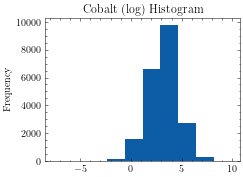

In [15]:
import matplotlib.pyplot as plt

plt.style.use('science')

wamex['Co'].plot(kind='hist', title='Cobalt (log) Histogram').get_figure().savefig('./img/cobaltlog.pdf')

In [16]:
def make_df_from_commods(unique_commods):
    if 'Co' not in unique_commods:
        unique_commods = unique_commods + ['Co']

    df_inputs = wamex[unique_commods + ['lat', 'lon']]

    df_inputs = df_inputs.dropna()
    ### Needs validation!
    df_inputs = df_inputs[df_inputs['Co'] < 5000]
    
    return df_inputs

In [17]:
def commod_models(df_inputs):
    y = df_inputs['Co']
    X = df_inputs.drop(columns=['Co'])

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, shuffle=True)

    lr = LinearRegression()
    lr.fit(X_train, y_train)

    lr_fn = make_pickle_fn(df_inputs, lr)

    with open(lr_fn, 'wb') as file:
        pickle.dump(lr, file)

    train_preds = lr.predict(X_train)
    test_preds = lr.predict(X_test)

    lr_train_mse = mean_squared_error(train_preds, y_train)
    lr_test_mse = mean_squared_error(test_preds, y_test)

    # Random Forest
    rf = RandomForestRegressor(max_features=0.5)
    rf.fit(X_train, y_train)

    rf_fn = make_pickle_fn(df_inputs, rf)
    with open(rf_fn, 'wb') as file:
        pickle.dump(rf, file)

    train_preds = rf.predict(X_train)
    test_preds = rf.predict(X_test)

    rf_train_mse = mean_squared_error(train_preds, y_train)
    rf_test_mse = mean_squared_error(test_preds, y_test)
    
    return {
        "lr_path": lr_fn,
        "lr_train_mse": lr_train_mse,
        "lr_test_mse": lr_test_mse,
        "rf_train_mse": rf_train_mse,
        "rf_test_mse": rf_test_mse,
    }

In [18]:
model_outputs = []

# sample = filtered_unique_commods[:3]

for unique_commods in tqdm(filtered_unique_commods):
    df_inputs = make_df_from_commods(unique_commods)
    model_output = commod_models(df_inputs)
    model_outputs.append(model_output)

100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:45<00:00,  1.70s/it]


In [19]:
model_outputs_df = pd.DataFrame(model_outputs)

In [20]:
model_outputs_df.to_csv('../../data/model_errors.csv')

In [21]:
model_outputs_df

,lr_path,lr_train_mse,lr_test_mse,rf_train_mse,rf_test_mse
0,../../pickles/LinearRegression-Ni-lat-lon.pickle,1.002014,0.982939,0.057526,0.404619
1,../../pickles/LinearRegression-Ni-lat-lon.pickle,1.002014,0.982939,0.056665,0.400883
2,../../pickles/LinearRegression-Cu-Fe-Ni-lat-lo...,0.907761,0.931356,0.050429,0.349677
3,../../pickles/LinearRegression-Cu-Ni-lat-lon.p...,0.951613,0.866928,0.054053,0.380720
4,../../pickles/LinearRegression-Cu-Ni-S-lat-lon...,1.034794,0.915617,0.055094,0.399100
5,../../pickles/LinearRegression-Ni-lat-lon.pickle,1.002014,0.982939,0.056894,0.404806
6,../../pickles/LinearRegression-Cu-Ni-lat-lon.p...,0.951613,0.866928,0.054904,0.379951
7,../../pickles/LinearRegression-Au-Cu-Ni-Pd-Pt-...,0.524660,0.534778,0.043583,0.311691
8,../../pickles/LinearRegression-Au-Cu-Ni-Pd-Pt-...,0.556201,0.418707,0.073289,0.370495
9,../../pickles/LinearRegression-Fe-Ni-lat-lon.p...,0.940294,0.997591,0.050937,0.391380


In [22]:
def clean_path_string(row):
    path = row['lr_path']
    row['lr_path'] = path.split('/')[-1].split('LinearRegression')[1].split('.')[0]
    return row
    
model_outputs_df = model_outputs_df.apply(clean_path_string, axis=1)

model_outputs_df.rename(columns={"lr_path": "commodities_used"})

,commodities_used,lr_train_mse,lr_test_mse,rf_train_mse,rf_test_mse
0,-Ni-lat-lon,1.002014,0.982939,0.057526,0.404619
1,-Ni-lat-lon,1.002014,0.982939,0.056665,0.400883
2,-Cu-Fe-Ni-lat-lon,0.907761,0.931356,0.050429,0.349677
3,-Cu-Ni-lat-lon,0.951613,0.866928,0.054053,0.380720
4,-Cu-Ni-S-lat-lon,1.034794,0.915617,0.055094,0.399100
5,-Ni-lat-lon,1.002014,0.982939,0.056894,0.404806
6,-Cu-Ni-lat-lon,0.951613,0.866928,0.054904,0.379951
7,-Au-Cu-Ni-Pd-Pt-lat-lon,0.524660,0.534778,0.043583,0.311691
8,-Au-Cu-Ni-Pd-Pt-Rh-lat-lon,0.556201,0.418707,0.073289,0.370495
9,-Fe-Ni-lat-lon,0.940294,0.997591,0.050937,0.391380


In [23]:
model_outputs_df.lr_path = model_outputs_df.lr_path.str.slice(1,stop=None)

### Linear Regression Error Visualisations

In [24]:
model_outputs_lr = model_outputs_df[['lr_path', 'lr_train_mse', 'lr_test_mse']]

In [25]:
model_outputs_lr.columns = model_outputs_lr.columns.str.replace('_', '\_')

In [26]:
model_outputs_lr['len'] = model_outputs_lr['lr\_path'].str.len()

C:\Users\elisi\AppData\Local\Temp/ipykernel_29028/764025356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_outputs_lr['len'] = model_outputs_lr['lr\_path'].str.len()


In [27]:
model_outputs_lr = model_outputs_lr.sort_values(by='len')

In [28]:
model_outputs_lr = model_outputs_lr.drop_duplicates(subset='lr\_path').set_index('lr\_path')

In [29]:
model_outputs_lr = model_outputs_lr.drop(columns=['len'])

In [30]:
plt.rcParams['font.size'] = 14

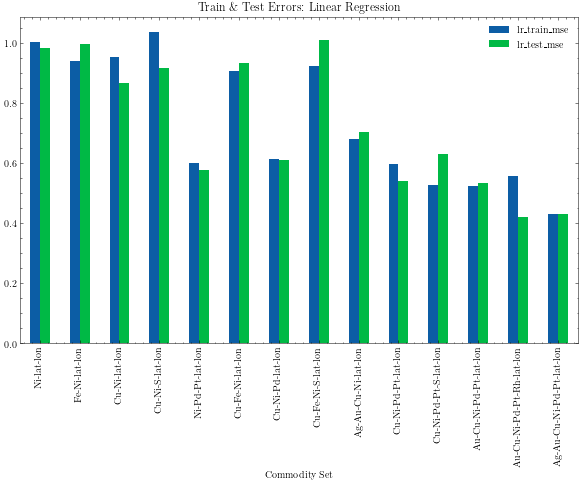

In [37]:
model_outputs_lr.plot(kind='bar', figsize=(10, 6), 
                      title='Train \& Test Errors: Linear Regression',
                     xlabel='Commodity Set').get_figure().savefig('./img/lrerr.jpg', dpi=300)

### Comparing Models

In [32]:
plt.rcParams['font.size'] = 10

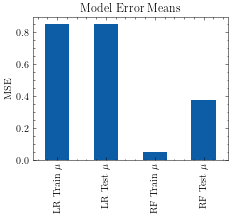

In [33]:
pd.Series({
    "LR Train \(\mu\)": model_outputs_df['lr_train_mse'].mean(),
    "LR Test \(\mu\)": model_outputs_df['lr_test_mse'].mean(),
    "RF Train \(\mu\)": model_outputs_df['rf_train_mse'].mean(),
    "RF Test \(\mu\)": model_outputs_df['rf_test_mse'].mean(),
}).plot(kind='bar', title='Model Error Means', ylabel='MSE').get_figure().savefig('./img/modelmeans.png')

In [34]:
model_outputs_lr

,lr\_train\_mse,lr\_test\_mse
lr\_path,,
Ni-lat-lon,1.002014,0.982939
Fe-Ni-lat-lon,0.940294,0.997591
Cu-Ni-lat-lon,0.951613,0.866928
Cu-Ni-S-lat-lon,1.034794,0.915617
Ni-Pd-Pt-lat-lon,0.599324,0.574948
Cu-Fe-Ni-lat-lon,0.907761,0.931356
Cu-Ni-Pd-lat-lon,0.613868,0.610489
Cu-Fe-Ni-S-lat-lon,0.922505,1.009840
Ag-Au-Cu-Ni-lat-lon,0.678779,0.703511
